## Plotting

Below we are plotting
1. Continous data (line plot, histogram) (time vs item sold)
2. Categorical data (box plot, histogram) (item sold)
3. Categorical data wrt a by column (box plot) 
4. Continous data wrt a by column (box plot) (churn vs num subscr)
5. Continous data vs mean by column (num subscr vs mean churn)  

In [3]:
import numpy as np
import math

# create a file with random values
fo = open('tmpfile.txt','w')

for i in range(0,100):
    a = math.sin(10*numpy.random.rand())
    b = math.cos(10*numpy.random.rand())
    c = 10*numpy.random.rand()
    d = 0 if numpy.random.rand() > 0.7 else 1

    s = str(a) +' '+str(b) +' '+str(c)+' '+str(d)
    
    fo.write("%s %s %s %s\n" % (a, b, c, d))
fo.close()    

# print histogram 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sales = pd.read_csv('tmpfile.txt', header=None,sep='\s+' )
sales.columns=['a','b','c','d']
sales['grp'] = ['A' if x > 5 else 'B' if  x > 3 else 'C' for x in sales.sum(axis=1)]

### Line plot of observations

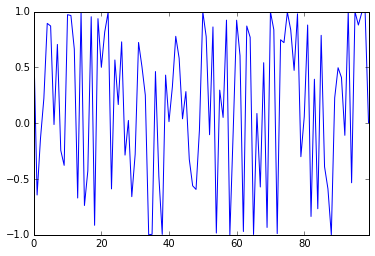

In [4]:
import plotly.plotly as py
# (*) To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py
# (*) Useful Python/Plotly tools
import plotly.tools as tls
# (*) Graph objects to piece together plots
from plotly.graph_objs import *

sales['a'].plot()

### Box plot of many columns

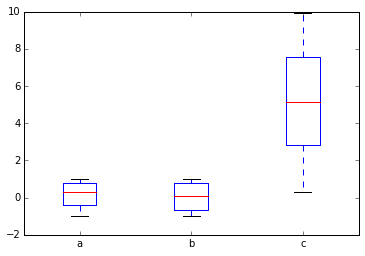

In [5]:
data = [sales.a, sales.b, sales.c]
plt.boxplot(data,labels=["a","b","c"])
plt.show()

### Crosstab with absolute and % values

In [7]:
def percConvert(ser):
  return ser/float(ser[-1])

print(pd.crosstab(sales.grp,sales.d,margins=True))
print(pd.crosstab(sales.grp,sales.d,margins=True).apply(percConvert, axis=1))



d     0   1  All
grp             
A    17  38   55
B     4  13   17
C    11  17   28
All  32  68  100
d           0         1  All
grp                         
A    0.309091  0.690909    1
B    0.235294  0.764706    1
C    0.392857  0.607143    1
All  0.320000  0.680000    1


### Stacked bar chart of one column crosstab

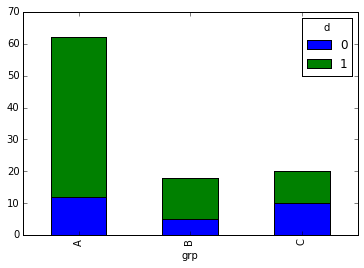

In [6]:
pd.crosstab(sales.grp,sales.d).plot(kind="bar",stacked=True)


### Stacked bar chart of one column crosstab 100%

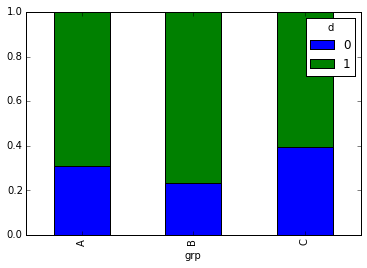

In [9]:
qq = pd.crosstab(sales.grp,sales.d)
qq.div(qq.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

In [10]:
freq, bins = np.histogram(sales.a, bins=10, range=None, normed=False, weights=None)
len(freq), len(bins)
print(bins)
pd.crosstab(freq,bins[1:])


[-0.99724823 -0.79821158 -0.59917492 -0.40013827 -0.20110162 -0.00206496
  0.19697169  0.39600834  0.595045    0.79408165  0.9931183 ]


col_0,-0.798211576348,-0.59917492289,-0.400138269431,-0.201101615973,-0.00206496251525,0.196971690943,0.396008344401,0.595044997859,0.794081651317,0.993118304775
row_0,,,,,,,,,,
6,0,1,0,0,0,0,0,0,0,0
7,0,0,1,0,1,1,0,1,0,0
9,1,0,0,1,0,0,0,0,0,0
10,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,0,0,0,1,0
27,0,0,0,0,0,0,0,0,0,1


In [11]:
bins

array([-0.99724823, -0.79821158, -0.59917492, -0.40013827, -0.20110162,
       -0.00206496,  0.19697169,  0.39600834,  0.595045  ,  0.79408165,
        0.9931183 ])

### Get mode of a column

In [12]:
from scipy.stats import mode
print(mode(sales.d))
print(mode(sales.d).mode[0])


ModeResult(mode=array([1]), count=array([68]))
1


### Box plot one column by dependent var

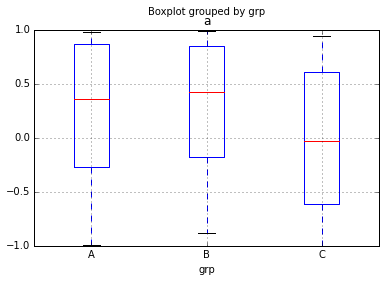

In [13]:
sales.boxplot(column='a',by='grp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108adec88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b964940>]], dtype=object)

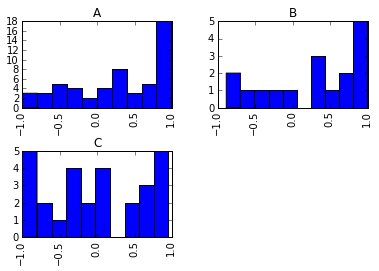

In [14]:
sales.hist(column="a",by="grp",bins=10)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



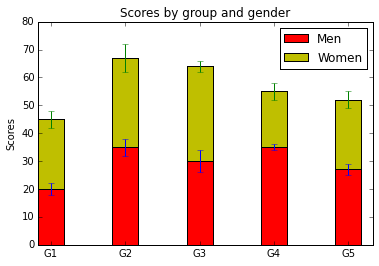

In [15]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

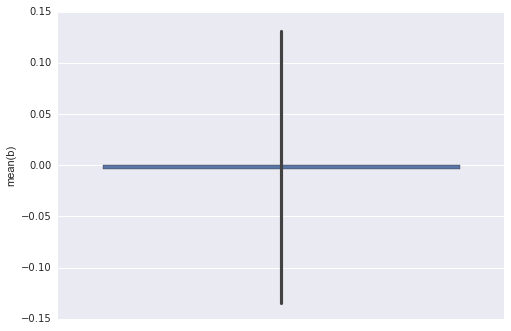

In [16]:
import seaborn as sns
sns.set(color_codes=True)
ax = sns.barplot(x= "b", hue="d", data=sales, orient="v", estimator=np.mean)
#sns.pointplot(data=sales,x="a",y="b",hue="d")
#ax = sns.tsplot(data=sales.a)


                           a         b         c         d
a                                                         
(-0.999, -0.798]   -0.944302 -0.260815  4.306705  0.777778
(-0.798, -0.599]   -0.716036 -0.523973  5.220596  0.666667
(-0.599, -0.4]     -0.515319 -0.311580  5.790237  0.714286
(-0.4, -0.201]     -0.309805  0.236007  4.427903  0.888889
(-0.201, -0.00206] -0.076719  0.554792  2.866021  0.714286
(-0.00206, 0.197]   0.117212  0.029986  4.156676  0.571429
(0.197, 0.396]      0.320045 -0.267893  5.774530  0.500000
(0.396, 0.595]      0.468539  0.199370  3.953980  0.428571
(0.595, 0.794]      0.698521  0.234448  4.306371  0.636364
(0.794, 0.993]      0.919043 -0.009116  5.024410  0.740741
4.58274280242


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



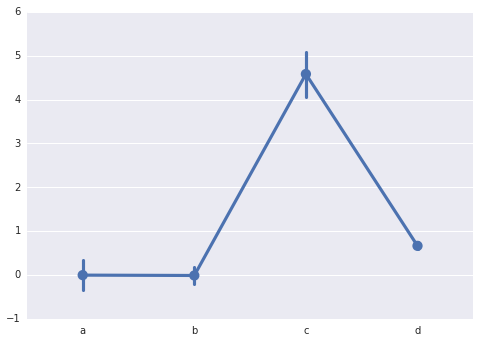

In [17]:
groups = sales.groupby(pd.cut(sales.a, 10))

d = groups.mean()
print(d)
ax = sns.pointplot(data=d)
print(d.c.mean())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c4ccf28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10c852588>]], dtype=object)

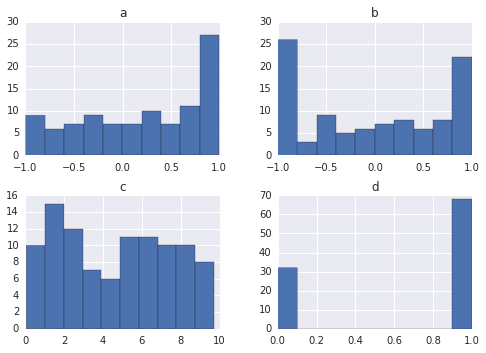

In [18]:
sales.hist()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:


The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.



{'boxes': [<matplotlib.lines.Line2D at 0x10c3f7630>,
 'caps': [<matplotlib.lines.Line2D at 0x10bcd65f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x10bd8a940>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x108ac5cf8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10ca9b940>,
  <matplotlib.lines.Line2D at 0x10c472be0>]}

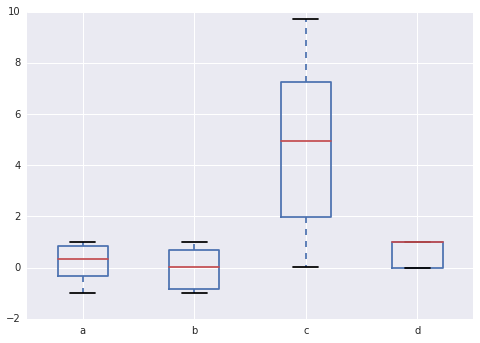

In [19]:
sales.boxplot()

In [20]:
count,division = np.histogram(sales.a)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ccb2588>]], dtype=object)

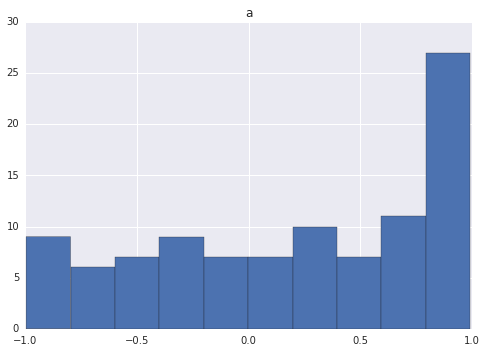

In [21]:
sales.hist(column='a',bins=division)

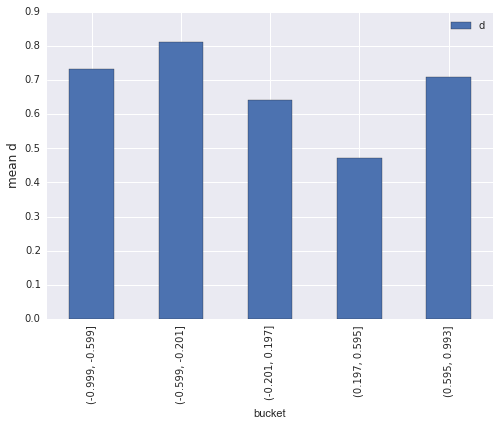

In [22]:
# Divide the column (a) values into n equally sized bins
n = 5
sales['bucket'] = pd.cut(sales.a, n)
# Group the bins and calculate the mean value for the target column (d)
newdf = sales[['bucket','d']].groupby('bucket').mean()
#print(newdf)
# Plot the results
ax = newdf.plot(kind='bar',stacked = True)
ax.set_ylabel("mean d",fontsize=12)


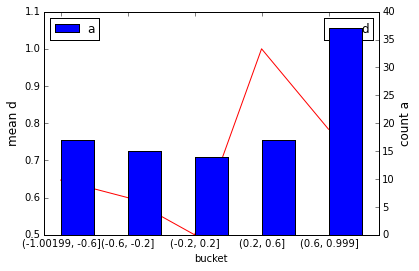

In [8]:
# Divide the column (a) values into n equally sized bins
n = 5
sales['bucket'] = pd.cut(sales.a, n)
# Group the bins and calculate the mean value for the target column (d)
newdf = sales[['bucket','d']].groupby('bucket').mean()

# use sum or count 
newdf2 = sales[['bucket','a']].groupby('bucket').count()
#print(newdf)
# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

newdf.plot(ax=ax,kind='line',color='red')
newdf2.plot(ax=ax2,kind='bar',position=0,color='blue')
ax.set_ylabel("mean d",fontsize=12)
ax2.set_ylabel("count a",fontsize=12)


plt.show()

In [24]:
sales[(sales.a > -0.00139) & (sales.a <= 0.198)].mean()

a    0.117212
b    0.029986
c    4.156676
d    0.571429
dtype: float64